Invocando librerias ...

In [10]:
# Librerias necesarias
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Librerias complementarias
import numpy as np
import matplotlib.pyplot as plt

PLAN: Estableciendo los data-sets y las etiquetas de cada posible valor del atributo target.

In [5]:
# Data
datos = keras.datasets.fashion_mnist

# Spliting automatico
(train_inputs, train_outputs), (test_inputs, test_outputs) = datos.load_data()

# Etiquetando cada elemento del tensor OutPut
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

CHECK: Forma de los datos de Train y Test

In [6]:
print("Shape de train_inputs:", train_inputs.shape)
print("Shape de train_outputs:", train_outputs.shape)
print("Shape de test_inputs:", test_inputs.shape)
print("Shape de test_outputs:", test_outputs.shape)

Shape de train_inputs: (60000, 28, 28)
Shape de train_outputs: (60000,)
Shape de test_inputs: (10000, 28, 28)
Shape de test_outputs: (10000,)


PLAN: Suiting los datos de Train y Test

In [7]:
# Normalizamos los tensores de entrenamiento
    # Para mejorar la convergencia y las diferencias de escalas
train_inputs = train_inputs / 255.0
test_inputs = test_inputs / 255.0

CHECK: Visualizar imagenes de los datos de Trainning

DO: ***CNN*** -> Definiendo la arquitectura de la NN

In [12]:
# ++ Capa de entrada
input_layer = keras.Input(shape=(28,28,1)) # -> 28 px * 28 px, con 1 canal de color

# + Capa de convolucion
    # Hiperparametros:
        # n_filtros = 64
        # filtro_size = (3,3)
        # padding='same' para que se conserve la dimension del tensor de entrada a la salida de la capa
x = layers.Conv2D(64,(3,3), activation='relu', padding='same')(input_layer)

# + Capa de MaxPooling
    # Size del Filtro_Convolucion = 2x2
x = layers.MaxPooling2D((2,2))(x)

# + Capa de Normalizacion para estabilizar
x = layers.BatchNormalization()(x)

# + Capa de aplanamiento para conectar con Capa_Densa
x = layers.Flatten()(x)

# + Capa 'full-conected' de 100 neuronas
    # Nota: El n de neuronas se puede optimizar con Meta-Learning
x = layers.Dense(100, activation='relu')(x)

# ++ Capa de Salida
n_clases = len(class_names) # Cantidad de clases del atributo target
x = layers.Dense(n_clases, activation='sigmoid')(x)

# Sellamos la arquitectura de NN para Clasificacion
output_layer = x

DO: ***CNN*** -> Compilando el modelo

In [17]:
# Instanciamos el modelo en funcion a las arquitecturas de las Capas de Entrada & Capa de Salida
clasificador = keras.Model(input_layer, output_layer)

# Setteamos la 'Tasa de aprendizaje':
    # Learning Rate: Hiperparametro que determina cuanto deben cambiar los pesos de las conexiones entre las neuronas en cada iteracion
lr = tf.keras.optimizers.Adam(learning_rate=0.001) # Valor moderado
lr_alto = tf.keras.optimizers.Adam(learning_rate=0.01) # Valor alto -> Compila mas rapido pero aumenta el riesgo de OverShooting (no seleccionar el optimo)
lr_bajo = tf.keras.optimizers.Adam(learning_rate=0.0001) # Valor bajo -> Compila menos rapido pero disminuye el riesgo de OverShooting (no seleccionar el optimo)

# Compilando ...
clasificador.compile(optimizer = lr, loss='sparse_categorical_crossentropy',metrics=['accuracy'])


CHECK: Resumen de las Capas

In [ ]:
clasificador.summary()

DO: ***CNN*** -> Entrenando a la maquina

In [18]:
# Entranamos al modelo
registro = clasificador.fit(train_inputs, train_outputs,
                epochs=5, # Cuantas veces la maquina recorrera los datos
                batch_size=100, # Cuantas muestras tomara para ajustar los pesos en el siguiente ...
                shuffle=True,
                validation_data=(test_inputs, test_outputs))

Epoch 1/5
600/600 [==============================] - 38s 60ms/step - loss: 0.3435 - accuracy: 0.8771 - val_loss: 0.3395 - val_accuracy: 0.8889
Epoch 2/5
600/600 [==============================] - 35s 59ms/step - loss: 0.2128 - accuracy: 0.9223 - val_loss: 0.2715 - val_accuracy: 0.9050
Epoch 3/5
600/600 [==============================] - 34s 57ms/step - loss: 0.1677 - accuracy: 0.9382 - val_loss: 0.2646 - val_accuracy: 0.9084
Epoch 4/5
600/600 [==============================] - 34s 57ms/step - loss: 0.1341 - accuracy: 0.9502 - val_loss: 0.3689 - val_accuracy: 0.8901
Epoch 5/5
600/600 [==============================] - 33s 56ms/step - loss: 0.1099 - accuracy: 0.9597 - val_loss: 0.3296 - val_accuracy: 0.8994


CHECK: Indicadores de Rendimiento: **ACCURACY** y **LOSS** tanto para el tensor de **Training** como para el tensor de **Testing**

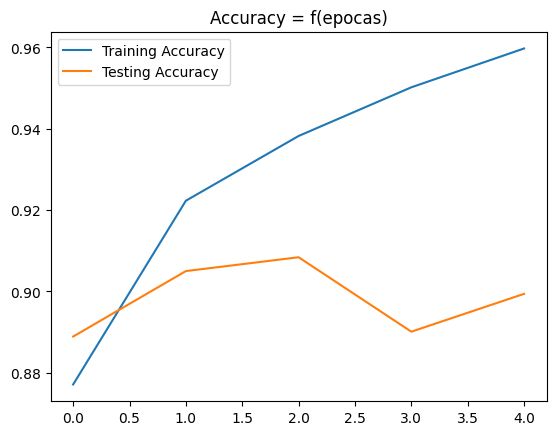

In [34]:
# ACCURACY

plt.figure()
plt.title("Accuracy = f(epocas)")
plt.plot( registro.history['accuracy'])
plt.plot( registro.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Testing Accuracy'])

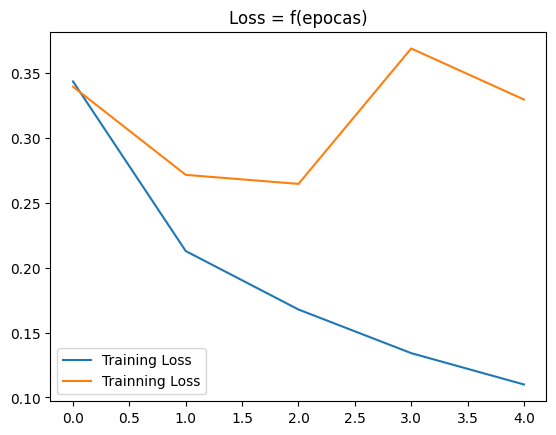

In [35]:
# LOSS

plt.figure()
plt.title("Loss = f(epocas)")
plt.plot( registro.history['loss'] )
plt.plot( registro.history['val_loss'] )
plt.legend(['Training Loss', 'Trainning Loss'])

Check: ***Matriz de Confusion***

313/313 [==============================] - 2s 7ms/step


Text(95.72222222222221, 0.5, 'Valor real del Target')

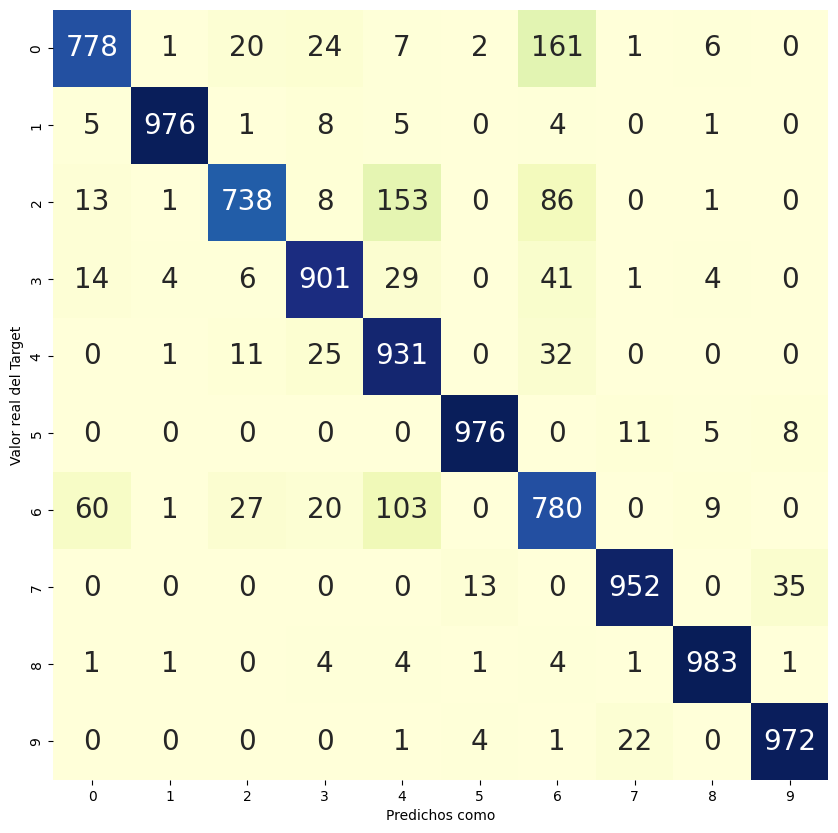

In [23]:
predictions = clasificador.predict(test_inputs)

# Importando librerias y metodos necesarios
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm=confusion_matrix(test_outputs, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g')
plt.xlabel('Predichos como')
plt.ylabel('Valor real del Target')

In [31]:
# Recordando ...

# Etiquetando cada elemento del tensor OutPut
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_df = pd.DataFrame(class_names)
print (class_df)

             0
0  T-shirt/top
1      Trouser
2     Pullover
3        Dress
4         Coat
5       Sandal
6        Shirt
7      Sneaker
8          Bag
9   Ankle boot


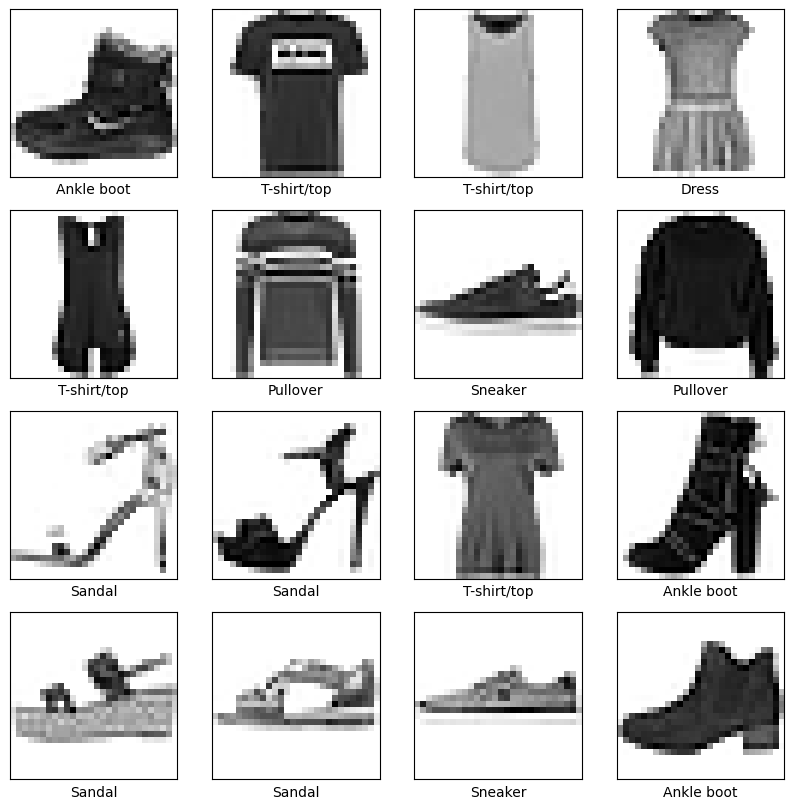

In [40]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_inputs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_outputs[i]])
plt.show()